### Yizhou Yao <br> DSC478 HW1 <br> Due: 4/19/2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; also show the distributions of values associated with categorical attributes. 

#### For numerical attributes, the means, standard deviations and other statistics are shown below:

In [234]:
bank = pd.read_csv("bank_data.csv")
# examine numerical variables
bank.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


#### For categorical attributes, the distributions of values are shown below:

In [235]:
# distribution for categorical variables
bank.iloc[:, 4:].describe()

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,600,600,600,600,600,600,600
unique,2,4,2,2,2,2,2,2
top,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,300,269,396,304,414,455,391,326


 ### 2. Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes (you do not need to plot distributions). Can you observe any significant differences between these segments of customers? Discuss your observations.

In [236]:
# split customers based on whether or not bought PEP
pep = bank[bank['pep'] == 'YES']
no_pep = bank[bank['pep'] == 'NO']

#### for people who buy PEP:

In [237]:
pep.describe() # numerical attributes

,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


In [238]:
pep.iloc[:, 4:11].describe() # categorical attributes

,gender,region,married,car,savings_acct,current_acct,mortgage
count,274,274,274,274,274,274,274
unique,2,4,2,2,2,2,2
top,MALE,INNER_CITY,YES,YES,YES,YES,NO
freq,144,123,154,138,179,211,182


#### For people who do NOT buy PEP:

In [239]:
no_pep.describe()

,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


In [240]:
no_pep.iloc[:, 4:11].describe()

,gender,region,married,car,savings_acct,current_acct,mortgage
count,326,326,326,326,326,326,326
unique,2,4,2,2,2,2,2
top,FEMALE,INNER_CITY,YES,NO,YES,YES,NO
freq,170,146,242,168,235,244,209


#### Compared to the people who do not buy PEP, there are higher proportion of males, higher proportion of car ownerships, higher mean of age and higher mean of income among the people who buy PEP.

### 3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [241]:
# calculate z-scores for each value in income
bank['z_income'] = (bank['income'] - bank['income'].mean())/bank['income'].std() 

In [242]:
bank.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,z_income
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071
5,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES,0.802015
6,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES,-1.445560
7,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO,-0.199809
8,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO,-0.172079
9,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO,-0.256749


#### z-normalized income is added into the above dataframe without changing original income column.

### 4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [245]:
bank['age_disc'] = pd.qcut(bank['age'], [0, .33, .66, 1], labels=['young', 'mid-age', 'old'])

In [246]:
bank.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,z_income,age_disc
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,old
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old
5,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES,0.802015,old
6,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES,-1.445560,young
7,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO,-0.199809,old
8,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO,-0.172079,mid-age
9,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO,-0.256749,old


### 5. Go back to the original data (before the transforamtions in parts 3 and 4 above) and use Min-Max Normalization to transform the values of all numeric attributes  (income, age, children) in the original table onto the range 0.0-1.0.

In [3]:
bank = pd.read_csv("bank_data.csv") # go back to the original data set before steps 3 & 4
min_max = lambda x: (x - x.min())/(x.max() - x.min()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
bank_min_max = bank.apply(min_max)
bank_min_max.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,ID12106,0.795918,0.565343,0.666667,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,ID12107,0.081633,0.066468,0.000000,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,ID12108,0.816327,0.342977,0.000000,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,ID12109,0.387755,0.349132,0.666667,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,ID12110,0.734694,0.330338,0.666667,MALE,TOWN,YES,YES,YES,YES,NO,NO


### 6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [263]:
bank_dummy = pd.get_dummies(bank_min_max, columns=['gender', 'region', 'married', 'car', 'savings_acct',
                             'current_acct', 'mortgage', 'pep'])
bank_dummy.to_csv('bank_numeric.csv', index=False)
bank_dummy.head(10)

,id,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,...,0,1,1,0,0,1,0,1,1,0
2,ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0
3,ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
4,ID12105,0.795918,0.783987,0.000000,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
5,ID12106,0.795918,0.565343,0.666667,1,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
6,ID12107,0.081633,0.066468,0.000000,0,1,0,1,0,0,...,1,0,1,0,0,1,1,0,0,1
7,ID12108,0.816327,0.342977,0.000000,0,1,0,0,0,1,...,0,1,0,1,0,1,1,0,1,0
8,ID12109,0.387755,0.349132,0.666667,1,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
9,ID12110,0.734694,0.330338,0.666667,0,1,0,0,0,1,...,0,1,0,1,0,1,1,0,1,0


### 7. Using the data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy].

In [250]:
bank_num = pd.read_csv('bank_numeric.csv')
bank_num = bank_num.drop(columns=['id']) # drop id column
bank_num.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


#### I noticed that "age" and "income" are strongly positively correlated, with a correlation coefficient equal to 0.75. That means when age increases, the income will increase as well. This strong positive correlation makes sense because as a peroson grows older he/she would position higher in the companies they work for and may more sources of income as well.

### 8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

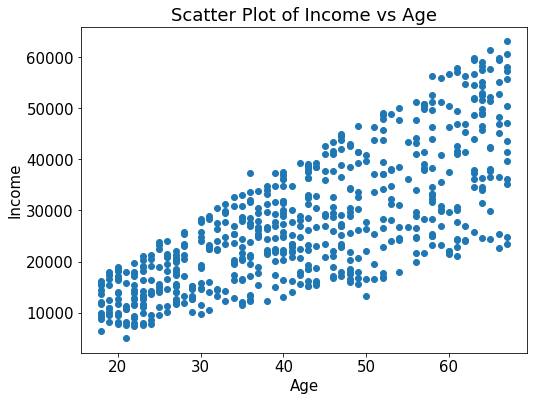

In [251]:
bank_original = pd.read_csv("bank_data.csv") # read non-normalized data again
income = bank_original['income']
age = bank_original['age']
plt.scatter(age, income)
plt.title("Scatter Plot of Income vs Age")
plt.xlabel('Age')
plt.ylabel('Income')
plt.rcParams.update({'font.size': 15, 'figure.figsize': (8, 6)})
plt.show()

#### Yes, income and age appear to be postively correlated as seen in the above scatter plot, i.e., as age increases, income increases as well.

### 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

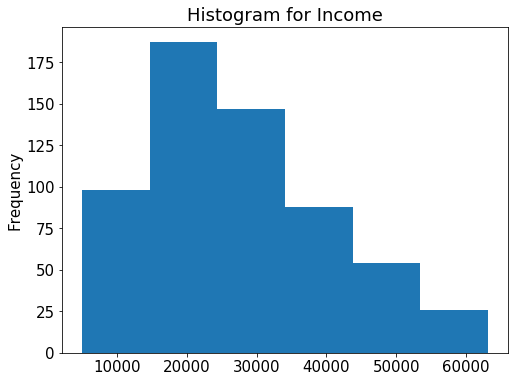

In [252]:
bank_original['income'].plot(kind='hist', bins=6, title="Histogram for Income")

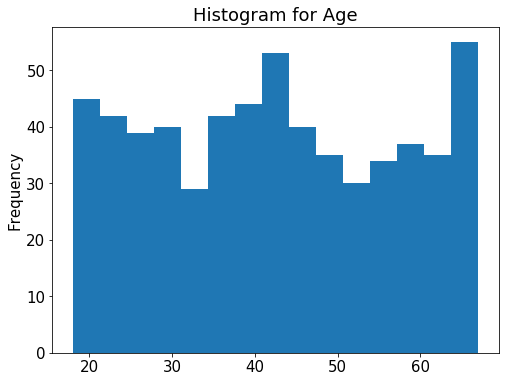

In [253]:
bank_original["age"].plot(kind="hist", bins=15, title="Histogram for Age")

### 10. Using a bargraph, plot the distribution of the values of the region attribute.

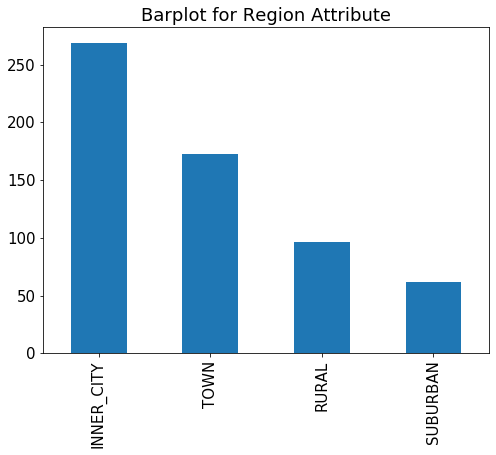

In [255]:
bank_original['region'].value_counts().plot(kind='bar', title="Barplot for Region Attribute")

### 11. Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

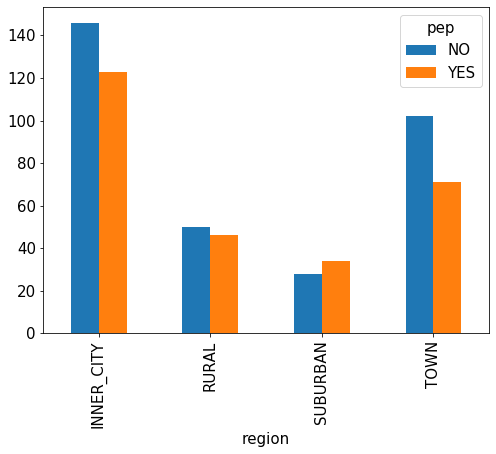

In [257]:
region_pep = pd.crosstab(bank_original['region'], bank_original['pep'])
region_pep.plot(kind="bar")